# 2 Preparation
- Import `Packages` and `Data` for Analysis Process.
- Data in this Notebook are separated into 5 Excel `xlsx` files: `athletes.xlsx`, `coaches.xlsx`, `entries-gender.xlsx`, `medals.xlsx` and `teams.xlsx`, we will try to use them all.

In [1]:
# Import Packages
import os
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Set some display option for Pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
athletes_filepath = './datasets/athletes.xlsx'
coaches_filepath = './datasets/coaches.xlsx'
entries_gender_filepath = './datasets/entries-gender.xlsx'
medals_filepath = './datasets/medals.xlsx'
teams_filepath = './datasets/teams.xlsx'

# Load Datasets
athletes = pd.read_excel(athletes_filepath)
coaches = pd.read_excel(coaches_filepath)
gender = pd.read_excel(entries_gender_filepath)
medals = pd.read_excel(medals_filepath)
teams = pd.read_excel(teams_filepath)

# Store them in a Dictionary for easy access
dfs = {
    'Athletes': athletes,
    'Coaches': coaches,
    'Entries Gender': gender,
    'Medals': medals,
    'Teams': teams,
}

C:\Users\GT\anaconda3\envs\tf\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# 3 Dataset Overviews
- Take a look at our Dataset' shapes, number of Column (Attribute) and number of Row (Entry).
- Basic Descriptive Analysis with `DataFrame.describe`

## 3.1 Quick Look

In [3]:
for df_key in dfs.keys():
    print('Shape of {}: ({}, {})'.format(df_key, dfs[df_key].shape[0], dfs[df_key].shape[1]))

Shape of Athletes: (11085, 3)
Shape of Coaches: (394, 4)
Shape of Entries Gender: (46, 4)
Shape of Medals: (93, 7)
Shape of Teams: (743, 4)


**Observations:**
- `Athletes` Dataset has the most entries, with `11085` rows (*yeah, understandable*).
- `Entries Gender` Dataset has the least entries, with only `46` rows.

Now, let's see the `first 5 entries` in each Dataset to get some sense about our Data:

In [4]:
# First 5 entries of Athletes
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [5]:
# First 5 entries of Coaches
coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [6]:
# First 5 entries of Entries Gender
gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [7]:
# First 5 entries of Medals
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [8]:
# And the last one, first 5 entries of Teams
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


## 3.2 Basics Descriptive Analysis

In [9]:
athletes.describe(include='all')

,Name,NOC,Discipline
count,11085,11085,11085
unique,11062,206,46
top,CHEN Yang,United States of America,Athletics
freq,2,615,2068


In [10]:
coaches.describe(include='all')

,Name,NOC,Discipline,Event
count,394,394,394,249
unique,381,61,9,6
top,REQUENA PERICAS Judit,Japan,Basketball,Men
freq,2,35,74,94


In [11]:
gender.describe(include='all')

,Discipline,Female,Male,Total
count,46,46.000000,46.000000,46.00000
unique,46,NaN,NaN,NaN
top,3x3 Basketball,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,118.086957,127.913043,246.00000
std,NaN,147.169717,166.900746,312.46134
min,NaN,10.000000,0.000000,19.00000
25%,NaN,42.750000,40.250000,85.50000
50%,NaN,90.000000,97.500000,190.00000
75%,NaN,138.750000,149.750000,288.75000


In [12]:
medals.describe(include='all')

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93,93.000000,93.000000,93.000000,93.000000,93.000000
unique,NaN,93,NaN,NaN,NaN,NaN,NaN
top,NaN,United States of America,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN
mean,46.333333,NaN,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,NaN,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,NaN,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,NaN,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,NaN,3.000000,4.000000,5.000000,11.000000,66.000000


In [13]:
teams.describe(include='all')

,Name,Discipline,NOC,Event
count,743,743,743,743
unique,146,20,84,36
top,Japan,Swimming,Japan,Men
freq,45,113,48,120


**Observations:**
- In `Coaches` Dataset:
    - We can see some `Name` are duplicated. It's because in their `Discipline`, there are more then one `Event`, `Artistic Swimming` has `Duet` and `Team` for instance.
    - Some coaches has empty `Event` entries, I don't know why, but I assume there are 2 possibilities: **(1)** They are coaching the whole `Discipline`, not, like, `Duet` or `Team` in specific, or **(2)** these empty entries are just missing value. 
- Everything else look good, we will analyze them more later.
- These Tables look imtimidated, let look at them from a different view point: **Visualization**.

# 4 Visualization

## 4.1 Univariate Analysis
We will start with visualizing those Tables in [3.2](#3.2) Section above to get a better look about them.

### 4.1.1 `Athletes` Dataset
Our `Athletes` Dataset has 2 Attributes to be visualized (their distribution), but they has so many unique values (`206` `NOC`s and `46` `Discipline`s. The solution here is just display **Top 10** with the highest frequency for each attribute.

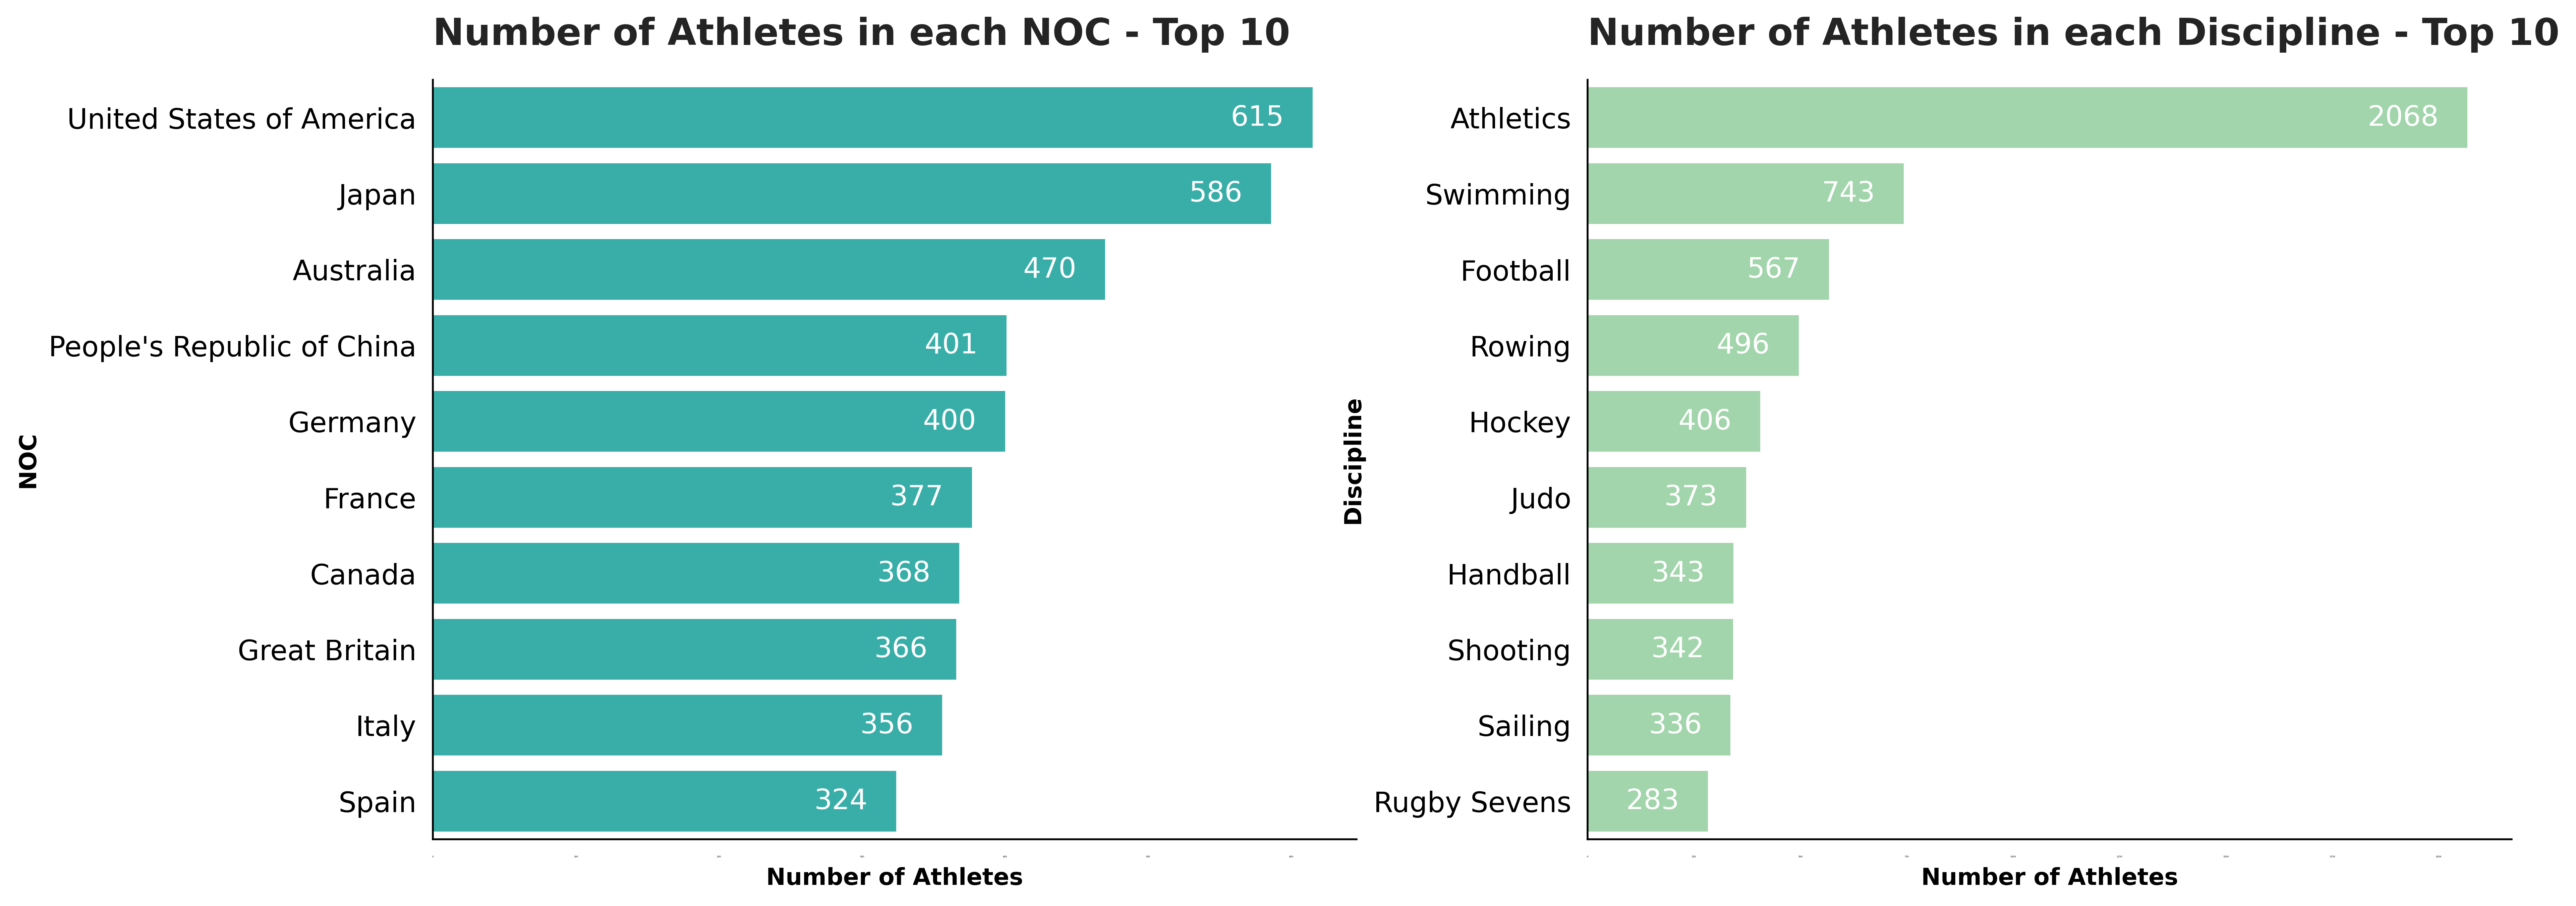

In [14]:
# Athletes's NOC distribution
athletes_noc_dist = athletes.groupby('NOC').count().sort_values(by='Discipline', ascending=False)['Discipline']
athletes_noc_dist_top10 = athletes_noc_dist.head(10)
# Athletes's Discipline Distribution
athletes_dis_dist = athletes.groupby('Discipline').count().sort_values(by='NOC', ascending=False)['NOC']
athletes_dis_dist_top10 = athletes_dis_dist.head(10)

plt.rcParams['text.color'] = '#242424'
plt.rcParams['figure.dpi'] = 500
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlelocation'] = 'left'
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['xtick.major.width'] = 0
plt.rcParams['xtick.labelsize'] = 0

# Create a new Figure
fig = plt.figure(figsize=(16, 6))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
# Remove Top and Right Spines
ax0.spines[['top', 'right']].set_visible(False)
ax1.spines[['top', 'right']].set_visible(False)

# Plotting
sns.barplot(ax=ax0, y=athletes_noc_dist_top10.index, x=athletes_noc_dist_top10, orient='h', color='#39aea9', saturation=1)
ax0.set_title('Number of Athletes in each NOC - Top 10')
ax0.set_xlabel('Number of Athletes')

sns.barplot(ax=ax1, x=athletes_dis_dist_top10, y=athletes_dis_dist_top10.index, orient='h', color='#a2d5ab', saturation=1)
ax1.set_title('Number of Athletes in each Discipline - Top 10')
ax1.set_xlabel('Number of Athletes')

# Add Text (Label) to Bars
x_axis = [1, 2068/615] # This is for the different ratio between 2 plot (plot 1 x_max=615 and plot 2 x_max=2068)
for i in range(2):
    for p in locals()['ax'+str(i)].patches:
        value = f'{p.get_width():.0f}'
        x = p.get_width() - 20 * x_axis[i]
        y = p.get_y() + p.get_height() / 2
        locals()['ax'+str(i)].text(x, y, value, ha='right', va='center', color = '#fff', size=12)
        
plt.savefig('plots/athletes_distribution_pair.png', bbox_inches='tight')

**Observations:**
- `USA` and `Japan` have the most `Athletes` engaged in Olympics 2021
    - Why `USA`? Uhmm... It's `USA`, so... understandable.
    - Why `Japan`? This Olympics 2021 took place in Tokyo, which is the Japan Capital, so once again, understandable.
    - The gap between them is small, `615` compares with `586` the different is just `29` Athletes, but the gap between them and the next position (Top 3) is quite large, `116`.
- But the number of athletes in each `Discipline` is a different story:
    - Top 1 belong to `Athletics` with 2068 Athletes, compares to just `743` Atheletes engaged in Top 2, `Swimming`, `1325` in different is a huge number.

But where is my beautiful Country, Vietnam? Let's see where we are.

In [15]:
v =athletes.groupby(by='NOC').count().sort_values(by='Name', ascending=False).reset_index()
vietnam_position = v[v['NOC'] == 'Vietnam'].index[0]

print('Position of our Beautiful Country Vietnam:', vietnam_position)

Position of our Beautiful Country Vietnam: 87


**Obseravations:**
- Oh, we rank `87/206`! That's not bad!
- But I want to learn more about my country here, let's take a little deeper dive and see

In [16]:
vietnam_athletes = athletes.set_index('NOC').loc['Vietnam']
print('Number of Vietnam Athletes:', vietnam_athletes.shape[0])
print('Number of Discipline we are engaged in:', len(vietnam_athletes['Discipline'].unique()))

Number of Vietnam Athletes: 17
Number of Discipline we are engaged in: 11


**Observations:**
- Feel like our impact in Olympics is not considerable right now, but a good sight is, we have lots of things that can be improved in the future! Let's see what our Nation can do!

### 4.1.2 `Coaches` Dataset
- Like the `Athletes` Dataset, We can plot 2 Features in this Dataset `NOC` and `Discipline` (`Event` is a minor feature, and it has no importance at all, I assumed).

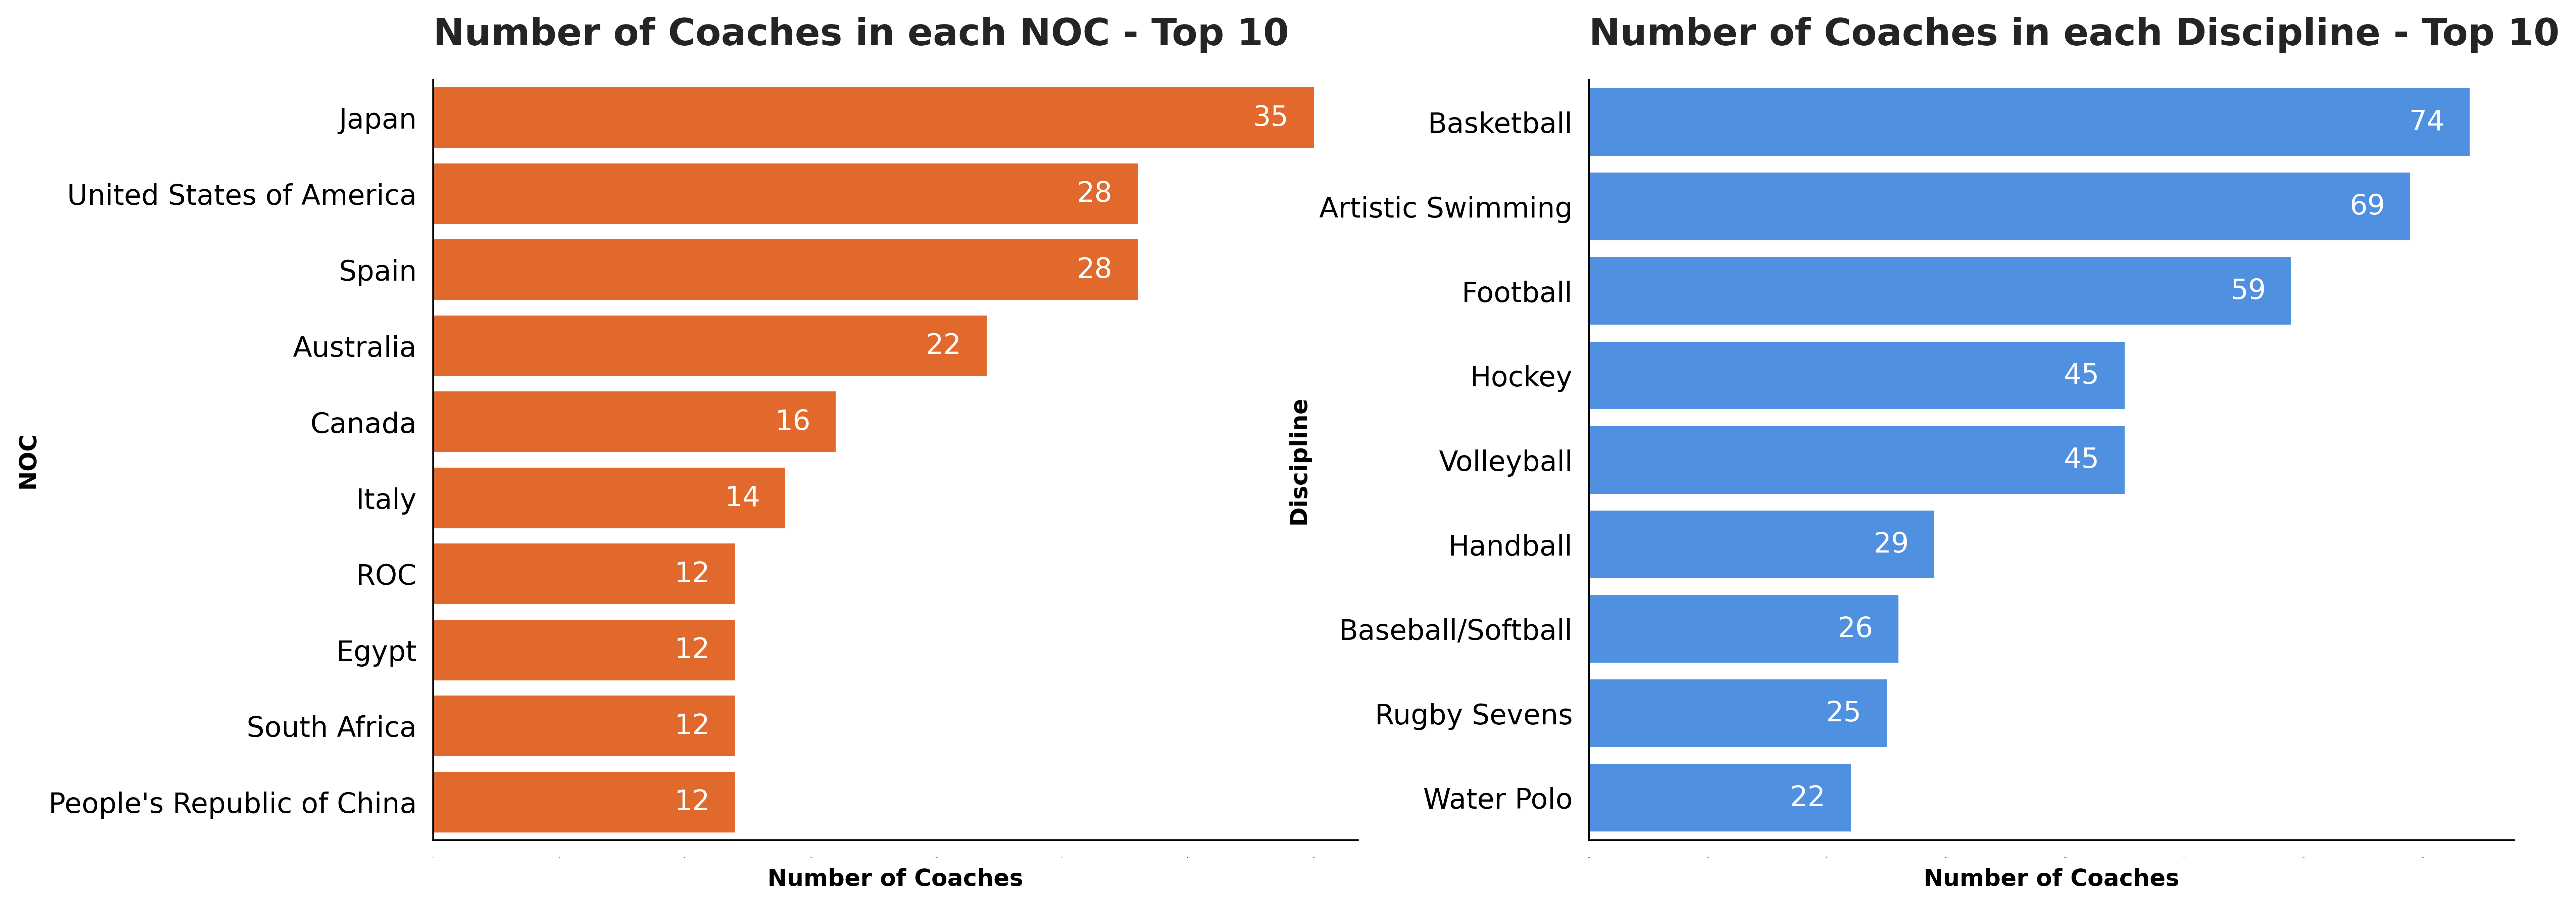

In [18]:
# Coaches's NOC distribution
coaches_noc_dist = coaches.groupby('NOC').count().sort_values(by='Discipline', ascending=False)['Discipline']
coaches_noc_dist_top10 = coaches_noc_dist.head(10)
# Coaches' Discipline Distribution
coaches_dis_dist = coaches.groupby('Discipline').count().sort_values(by='NOC', ascending=False)['NOC']
coaches_dis_dist_top10 = coaches_dis_dist.head(10)

# Create a new Figure
fig = plt.figure(figsize=(16, 6))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
# Remove Top and Right Spines
ax0.spines[['top', 'right']].set_visible(False)
ax1.spines[['top', 'right']].set_visible(False)

# Plotting
sns.barplot(ax=ax0, y=coaches_noc_dist_top10.index, x=coaches_noc_dist_top10, orient='h', color='#E0692B', saturation=1)
ax0.set_title('Number of Coaches in each NOC - Top 10')
ax0.set_xlabel('Number of Coaches')

sns.barplot(ax=ax1, x=coaches_dis_dist_top10, y=coaches_dis_dist_top10.index, orient='h', color='#4F90E0', saturation=1)
ax1.set_title('Number of Coaches in each Discipline - Top 10')
ax1.set_xlabel('Number of Coaches')

# Add Text (Label) to Bars
x_axis = [1, 74/35] # This is for the different ratio between 2 plot (plot 1 x_max=35 and plot 2 x_max=74)
for i in range(2):
    for p in locals()['ax'+str(i)].patches:
        value = f'{p.get_width():.0f}'
        x = p.get_width() - 1 * x_axis[i]
        y = p.get_y() + p.get_height() / 2
        locals()['ax'+str(i)].text(x, y, value, ha='right', va='center', color = '#fff', size=12)
        
plt.savefig('plots/coaches_distribution_pair.png', bbox_inches='tight')

**Observations:**
- In term of Number of Coaches, `Japan` outranked `USA` to took the First Place, with `35` Coaches compares to `28` of `USA`.
- The Number of Coaches of `Japan` is *triple* the ones of `Top 6` to `Top 10`, that is a considerable number.
- Despite the number of `Athletes` engaged in `Athletics` is the largest, the number of `Coaches` in this `Discipline` can't be found on `Top 10` this time, and `Basketball` is in the opposite extreme.

### 4.1.3 `Gender Entries` Dataset
- In `Gender Entries` Dataset, we has 4 Features: `Discipline`, Number of `Male`, `Female` and `Total` for each `Discipline`.

In [24]:
gender_dist_all = gender[['Female', 'Male']].sum(axis=0)

In [60]:
plt.rcParams['text.color'] = '#242424'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlelocation'] = 'center'
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12

fig = plt.figure(figsize=(32, 32))
gs = fig.add_gridspec(3, 3)

plot_no = 0
for col in range(3):
    for row in range(3):
        locals()['ax'+str(plot_no)] = fig.add_subplot(gs[col, row])
        locals()['ax'+str(plot_no)].spines[['top', 'right']].set_visible(False)
        plot_no += 1
        
# (plot_no=0) Gender Distribution for whole Olympics (sum of all Discipline)
sns.barplot(ax=ax0, x=gender_dist_all.index, y=gender_dist_all, color="#2CAD88")
ax0.set_title('Gender Distribution in All Discipline')
ax0.set_xlabel('Gender')
ax0.set_ylabel('Number of Athletes')
# Add Text to plot_no=0
for p in ax0.patches:      
    value = f'{p.get_height():.0f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() - 0.075*5884
    ax0.text(x, y, value, ha='center', size=18, color='#fff')

plot_data = gender.set_index('Discipline')[['Female', 'Male']].T

plot_no = 1
# (Plot_no=[1..11]) Plot all other 11 plot (first 11 Discipline)
for discipline in plot_data.columns:
    # Add Chart
    sns.barplot(ax=locals()['ax'+str(plot_no)], x=plot_data.index, y=plot_data.loc[:, discipline], color='#2CAD88')
    locals()['ax'+str(plot_no)].set_title('Gender Distribution in ' + discipline)
    locals()['ax'+str(plot_no)].set_xlabel('Gender')
    locals()['ax'+str(plot_no)].set_ylabel('Number of Athletes')
    # Add Text (Label)
    for p in locals()['ax'+str(plot_no)].patches:
        value = f'{p.get_height():.0f}'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() - 0.075*max(plot_data.loc[:, discipline])
        # There is one value = 0, we don't want to plot it
        if value !=0:
            locals()['ax'+str(plot_no)].text(x, y, value, ha='center', size=18, color='#fff')
    plot_no += 1
    if plot_no == 9:
        break # Just plot 8 more discipline, so break if enough
        
plt.savefig('./plots/gender-distribution-12plot.png', bbox_inches='tight', )

**Observations:**
- The Gender distribution is equally distributed in most Discipline.
    - In `Baseball/Softball`, this distribution is not quite equal (`144 Male` and only `90 Female`).
    - `Artistic Swimming` is in a completely different extreme, where there are **`100%`** `Athletes` engaged in this `Discipline` are `Female`. Huh? But yea, understandable, if you don't understand why, just google that Sport and you will know :)

### 4.1.3 `Medals` Dataset
`Medals` Dataset contains some infomative information: We have all `Team/NOC`s with their `Rank`, `Total` Medals they achieved, their `Rank by Total` and most importantly, `Gold`, `Silver`, `Bronze` for the number of Gold Medals, Silver Medals and Bronze Medals they achieved, respectively.

In [61]:
medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7
